In [105]:
#importing all the neccesary libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [106]:
#importing the dataset
df=pd.read_csv('messages.csv',header=0)

In [107]:
df

subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  
0     content - length : 3386 apple-iss research cen...      0  
1     lang classification grimes , joseph e . and ba...      0  
2     i am posting this inquiry for sergei atamas ( ...      0  
3     a colleague and i are researching the differin...      0  
4     earlier this morning i was on the phone with a...      0  
...                                                 ...    ...  
2888  hello thanks for stopping by ! ! we have taken...      1  
2889  the list owner of : " kiddin " has invited you...      1  
2890  judging from the return post , i must have sou...      0  
2891  gotcha ! there are two separate fallacies in t...      0  
2892  hello ! i ' m working on a thesis concerning a...      0  

[2893 rows x 3 columns]

In [108]:
df.shape

(2893, 3)

In [109]:
print('ham and spam counts - >',df['label'].value_counts())    #1---spam, 0----ham

ham and spam counts - > 0    2412
1     481
Name: label, dtype: int64


In [110]:
a=len(df[df['label']==1])

In [111]:
b=len(df[df['label']==0])

In [112]:
c=len(df)

In [113]:
#calculating the percentage of spam and ham in the dataset
print("perc of spam in msgs is:",(a/c)*100)

perc of spam in msgs is: 16.626339440027653


In [114]:
print("perc of hams in msgs is:",(b/c)*100)

perc of hams in msgs is: 83.37366055997235


In [115]:
#initial length of the messages
df['length']=df['message'].str.len()

In [116]:
df.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  length  
0  content - length : 3386 apple-iss research cen...      0    2856  
1  lang classification grimes , joseph e . and ba...      0    1800  
2  i am posting this inquiry for sergei atamas ( ...      0    1435  
3  a colleague and i are researching the differin...      0     324  
4  earlier this morning i was on the phone with a...      0    1046

In [117]:
# use regular expressions to replace email addresses, URLs, phone numbers, other numbers

# Replace email addresses with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollars')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumbr')
    
# Replace numbers with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [118]:
df

subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  length  
0     content - length : numbr apple-iss research ce...      0    2856  
1     lang classification grimes , joseph e . and ba...      0    1800  
2     i am posting this inquiry for sergei atamas ( ...      0    1435  
3     a colleague and i are researching the differin...      0     324  
4     earlier this morning i was on the phone with a...      0    1046  
...                                                 ...    ...     ...  
2888  hello thanks for stopping by ! ! we have taken...      1     262  
2889  the list owner of : " kiddin " has invited you...      1    2163  
2890  judging from the return post , i must have sou...      0    1039  
2891  gotcha ! there are two separate fallacies in t...      0    2949  
2892  hello ! i ' m working on a thesis concerning a...      0     700  

[2893 rows x 4 columns]

In [119]:
df.to_csv('dfcleaned_spam_class.csv')

In [120]:
import nltk
from nltk.corpus import stopwords
import string

In [121]:
sw=set(stopwords.words('english')+['u','ur','hw',1,4,0])

In [122]:
df['message'] = df['message'].apply(lambda x: ' '.join(i for i in x.split() if i not in sw))

In [123]:
#cleaned length of the messages
df['cl_length']=df['message'].str.len()

In [124]:
df

subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  length  \
0     content - length : numbr apple-iss research ce...      0    2856   
1     lang classification grimes , joseph e . barbar...      0    1800   
2     posting inquiry sergei atamas ( satamas @ umab...      0    1435   
3     colleague researching differing degrees risk p...      0     324   
4     earlier morning phone friend mine living south...      0    1046   
...                                                 ...    ...     ...   
2888  hello thanks stopping ! ! taken many new pics ...      1     262   
2889  list owner : " kiddin " invited join mailing l...      1    2163   
2890  judging return post , must sounded like kind s...      0    1039   
2891  gotcha ! two separate fallacies argument n-ary...      0    2949   
2892  hello ! ' working thesis concerning attitudes ...      0     700   

      cl_length  
0          2526  
1          1643  
2          1184  
3           220  
4           719  
...         ...  
2888        144  
2889       1649  
2890        722  
2891       2033  
2892        594  

[2893 rows x 5 columns]

In [125]:
print("sum of original len",df['length'].sum())

sum of original len 9344743


In [126]:
print("sum of cleaned length is:",df['cl_length'].sum())

sum of cleaned length is: 7809326


In [127]:
#plotting the graphs

In [128]:
import seaborn as sns
from matplotlib import pyplot as plt

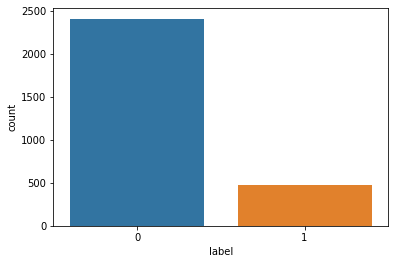

In [171]:
sns.countplot(df['label'])

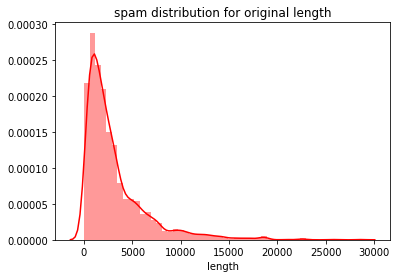

In [129]:
sns.distplot(df[df['label']==0]['length'],label='spam dist',color='r')
plt.title('spam distribution for original length')
plt.show()
plt.figsize=(16,8)

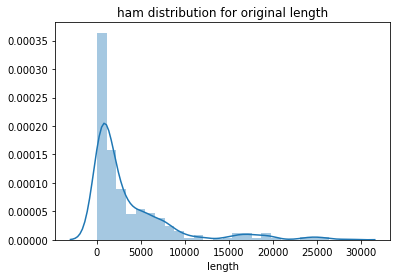

In [130]:
sns.distplot(df[df['label']==1]['length'],label='ham dist')
plt.title('ham distribution for original length')
plt.show()
plt.figsize=(16,8)

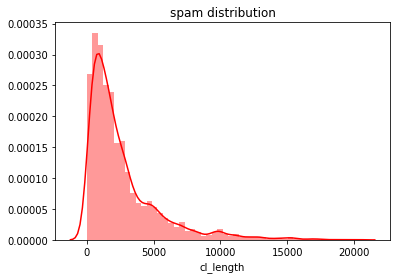

In [131]:
sns.distplot(df[df['label']==0]['cl_length'],label='spam dist',color='r')
plt.title('spam distribution')
plt.show()
plt.figsize=(16,8)

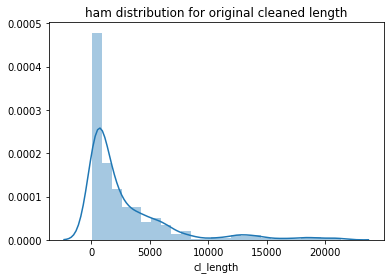

In [132]:
sns.distplot(df[df['label']==1]['cl_length'],label='ham dist')
plt.title('ham distribution for original cleaned length')
plt.show()
plt.figsize=(16,8)

In [169]:
#plotting the wordcloud

In [133]:
from wordcloud import WordCloud

In [134]:
spams=df['message'][df['label']==1]

In [135]:
spam_cloud=WordCloud(width=800,height=600,background_color='white',max_words=50).generate(' '.join(spams))

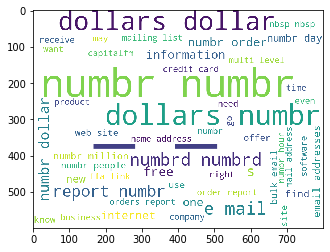

In [136]:
spam_cloud
plt.imshow(spam_cloud)

In [137]:
hams=df['message'][df['label']==0]

In [138]:
ham_cloud=WordCloud(width=800,height=600,background_color='white',max_words=50).generate(' '.join(hams))

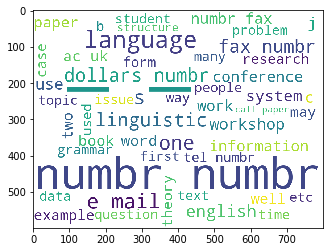

In [139]:
plt.imshow(ham_cloud)

FEATURE SCALING

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [141]:
tf=TfidfVectorizer()

In [142]:
tfid=tf.fit_transform(df['message'])

In [143]:
tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [144]:
y=df['label']

In [145]:
x=tfid

In [146]:
tfid

<2893x55070 sparse matrix of type '<class 'numpy.float64'>'
	with 506816 stored elements in Compressed Sparse Row format>

In [147]:
x.shape

(2893, 55070)

In [148]:
y.shape

(2893,)

In [170]:
#using Random forest Classifier

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
rf=RandomForestClassifier(n_estimators=50,max_depth=20)

In [151]:
from sklearn.model_selection import KFold,cross_val_score

In [152]:
k_fold=KFold(n_splits=5)
cross_val_score(rf,x,y,cv=5,scoring='accuracy',n_jobs=-1)

array([0.93091537, 0.92055268, 0.93782383, 0.93079585, 0.92214533])

In [153]:
from sklearn.metrics import precision_recall_fscore_support as score

In [154]:
rf_model=rf.fit(x_train,y_train)

In [155]:
predrf=rf_model.predict(x_test)
precision,recall,fscore,support=score(y_test,predrf,pos_label=1 ,average='binary')

In [156]:
print('precision:{} recall:{} fscore:{} support:{} '.format(precision,recall,fscore,support))

precision:1.0 recall:0.5494505494505495 fscore:0.7092198581560284 support:None 


In [172]:
#using multinomial naive bayes classifier

In [157]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [158]:
mnb=MultinomialNB()

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)

In [160]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [161]:
predmnb=mnb.predict(x_test)

In [173]:
#performance metrics

In [162]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [163]:
accuracy_score(y_test,predmnb)

0.8240837696335078

In [164]:
print('F1 score is',f1_score(y_test,predmnb))

F1 score is 0.14285714285714288


In [165]:
print(classification_report(y_test,predmnb))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       773
           1       1.00      0.08      0.14       182

    accuracy                           0.82       955
   macro avg       0.91      0.54      0.52       955
weighted avg       0.86      0.82      0.76       955



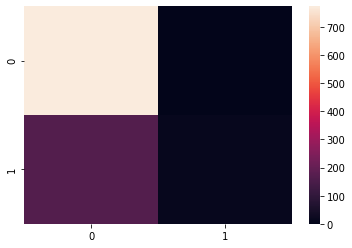

In [174]:
#plotting confusion matrix using heatmap
sns.heatmap(confusion_matrix(y_test,predmnb))

In [167]:
confusion_matrix(y_test,predmnb)

array([[773,   0],
       [168,  14]], dtype=int64)

In [178]:
#dumping the file using serialization

In [175]:
import joblib

In [177]:
joblib.dump(rf,'customer_churn.obj')

['customer_churn.obj']

In [168]:
#                     %%%%%%%%%%%%----end----%%%%%%%%%%%